In [2]:
import numpy as np
import matplotlib.pyplot as plt

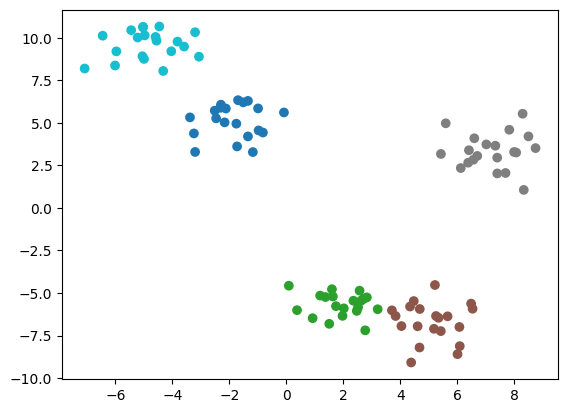

In [74]:
from sklearn.datasets import make_blobs

data, labels = make_blobs(n_samples=100, n_features=2, centers=5)

plt.scatter(data[:,0], data[:,1], c=labels, cmap="tab10")

In [ ]:
def nearest(data, x):
    min_dist = np.inf
    min_i = -1
    for i in range(len(data)):
        d = np.linalg.norm(data[i] - x)
        if d < min_dist:
            min_dist = d
            min_i = i
    return min_i

In [65]:
def knn(data, n):
    # Pick n random points from the data for initial centroids
    centroids = data[np.random.choice(len(data), n, replace=False)]
    labels = np.zeros(len(data))

    for i in range(20):
        for i in range(len(data)):
            near = nearest(centroids, data[i])
            labels[i] = near
        
        for i in range(n):
            centroids[i] = np.mean(data[labels == i], axis=0)
    
    return centroids

def predict(data, centroids):
    labels = np.zeros(len(data))
    for i in range(len(data)):
        labels[i] = nearest(centroids, data[i])
    return labels

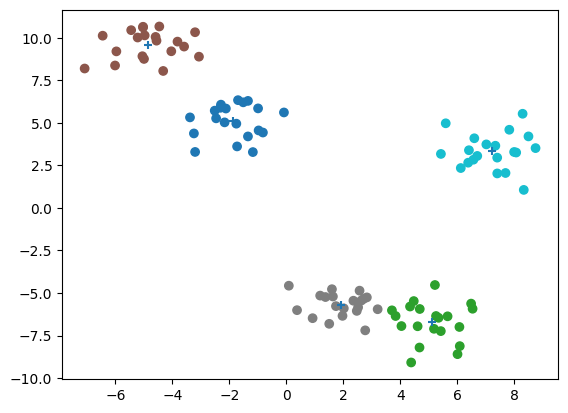

In [102]:
centroids = knn(data, 5)
labels_predicted = predict(data, centroids)

plt.scatter(data[:,0], data[:,1], c=labels_predicted, cmap="tab10")
plt.scatter(centroids[:,0], centroids[:,1], marker="+")